# Data Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/top250-00-19.csv')

In [3]:
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [4]:
df.isna().sum()

Name               0
Position           0
Age                0
Team_from          0
League_from        0
Team_to            0
League_to          0
Season             0
Market_value    1260
Transfer_fee       0
dtype: int64

In [5]:
median_market_value = df['Market_value'].median()
df['Market_value'].fillna(median_market_value, inplace=True)

1. **Robustness to Outliers:** The median is less affected by outliers compared to the mean, ensuring that extreme values in the "Market_value" column do not unduly influence the imputed values.


2. **Preservation of Distribution:** Imputing missing values with the median maintains the overall distribution of the data, as it represents the middle value and is not skewed by extreme values.


3. **Suitability for Skewed Data:** In cases of skewed data distributions, the median is a more appropriate measure of central tendency than the mean, ensuring that imputed values align better with the underlying distribution of the data.

In [6]:
df.isna().sum()

Name            0
Position        0
Age             0
Team_from       0
League_from     0
Team_to         0
League_to       0
Season          0
Market_value    0
Transfer_fee    0
dtype: int64

In [7]:
df.columns

Index(['Name', 'Position', 'Age', 'Team_from', 'League_from', 'Team_to',
       'League_to', 'Season', 'Market_value', 'Transfer_fee'],
      dtype='object')

In [9]:
df['Position'].value_counts()

Position
Centre-Forward        1218
Centre-Back            714
Central Midfield       487
Attacking Midfield     426
Defensive Midfield     411
Right Winger           305
Left Winger            267
Left-Back              225
Right-Back             181
Goalkeeper             180
Second Striker         130
Left Midfield           87
Right Midfield          63
Forward                  3
Sweeper                  1
Defender                 1
Midfielder               1
Name: count, dtype: int64

In [10]:
df.describe()

,Age,Market_value,Transfer_fee
count,4700.000000,4.700000e+03,4.700000e+03
mean,24.338723,7.919424e+06,9.447586e+06
std,3.230809,7.613327e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,4.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,8.050000e+06,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  4700 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


# Label Encoding

Encoding categorical variables is an essential step in preparing the data for machine learning models. We'll use one-hot encoding to convert categorical variables into numerical representations.


After encoding, each categorical variable will be replaced with multiple binary variables indicating the presence or absence of each category.

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in ['Position', 'Team_from', 'League_from', 'Team_to', 'League_to', 'Season']:
    df[col] = label_encoder.fit_transform(df[col])

df.head()


,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,13,27,183,68,243,36,0,6000000.0,60000000
1,Hernán Crespo,3,25,386,97,176,54,0,6000000.0,56810000
2,Marc Overmars,9,27,43,84,110,36,0,6000000.0,40000000
3,Gabriel Batistuta,3,31,217,97,9,54,0,6000000.0,36150000
4,Nicolas Anelka,3,21,426,68,221,43,0,6000000.0,34500000


In [13]:
df.describe()

,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
count,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4.700000e+03,4.700000e+03
mean,4.997234,24.338723,284.832128,74.125532,170.157660,43.074043,8.999787,7.919424e+06,9.447586e+06
std,4.414397,3.230809,165.374747,25.850347,95.918634,11.236779,5.471064,7.613327e+06,1.043772e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04,8.250000e+05
25%,2.000000,22.000000,141.000000,60.000000,88.750000,36.000000,4.000000,4.500000e+06,4.000000e+06
50%,3.000000,24.000000,278.000000,78.000000,176.000000,46.000000,9.000000,6.000000e+06,6.500000e+06
75%,8.000000,27.000000,426.000000,97.000000,260.250000,48.000000,14.000000,8.050000e+06,1.082000e+07
max,16.000000,35.000000,569.000000,117.000000,324.000000,64.000000,18.000000,1.200000e+08,2.220000e+08


In [14]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
corr_matrix = df_numeric.corr()
corr_matrix

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,NaN,1.000000,-0.017571,0.007078,0.024711,-0.025520,0.009378,0.040718,0.004298,0.010712
Age,NaN,-0.017571,1.000000,0.020330,0.088812,-0.007739,0.097579,-0.014985,0.121807,-0.001803
Team_from,NaN,0.007078,0.020330,1.000000,0.031151,0.031294,0.024593,0.027013,-0.010806,0.007143
League_from,NaN,0.024711,0.088812,0.031151,1.000000,0.038259,0.322655,0.215854,0.017741,0.081240
Team_to,NaN,-0.025520,-0.007739,0.031294,0.038259,1.000000,-0.006001,0.044658,-0.049276,-0.029614
League_to,NaN,0.009378,0.097579,0.024593,0.322655,-0.006001,1.000000,0.098013,0.001793,0.044460
Season,NaN,0.040718,-0.014985,0.027013,0.215854,0.044658,0.098013,1.000000,0.246701,0.311943
Market_value,NaN,0.004298,0.121807,-0.010806,0.017741,-0.049276,0.001793,0.246701,1.000000,0.780574
Transfer_fee,NaN,0.010712,-0.001803,0.007143,0.081240,-0.029614,0.044460,0.311943,0.780574,1.000000


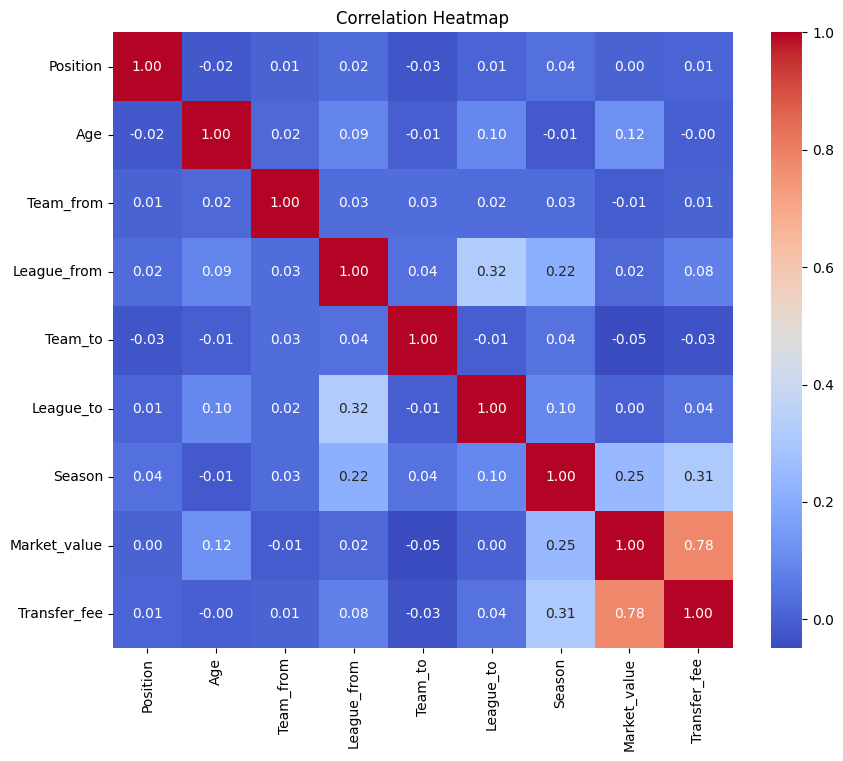

In [15]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')

df_numeric = df_numeric.dropna(axis=1, how='any')

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [16]:
df.columns

Index(['Name', 'Position', 'Age', 'Team_from', 'League_from', 'Team_to',
       'League_to', 'Season', 'Market_value', 'Transfer_fee'],
      dtype='object')

# Feature Importance

In [32]:
from sklearn.ensemble import RandomForestRegressor

X = df[['Position', 'Age', 'Team_from', 'League_from', 'Team_to',
       'League_to', 'Season', 'Market_value']]
y = df['Transfer_fee']

rf_regressor = RandomForestRegressor(random_state=0)

rf_regressor.fit(X, y)

feature_importance = rf_regressor.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

        Feature  Importance
7  Market_value    0.664397
2     Team_from    0.064460
6        Season    0.061178
1           Age    0.054477
4       Team_to    0.053089
0      Position    0.035644
3   League_from    0.034721
5     League_to    0.032035


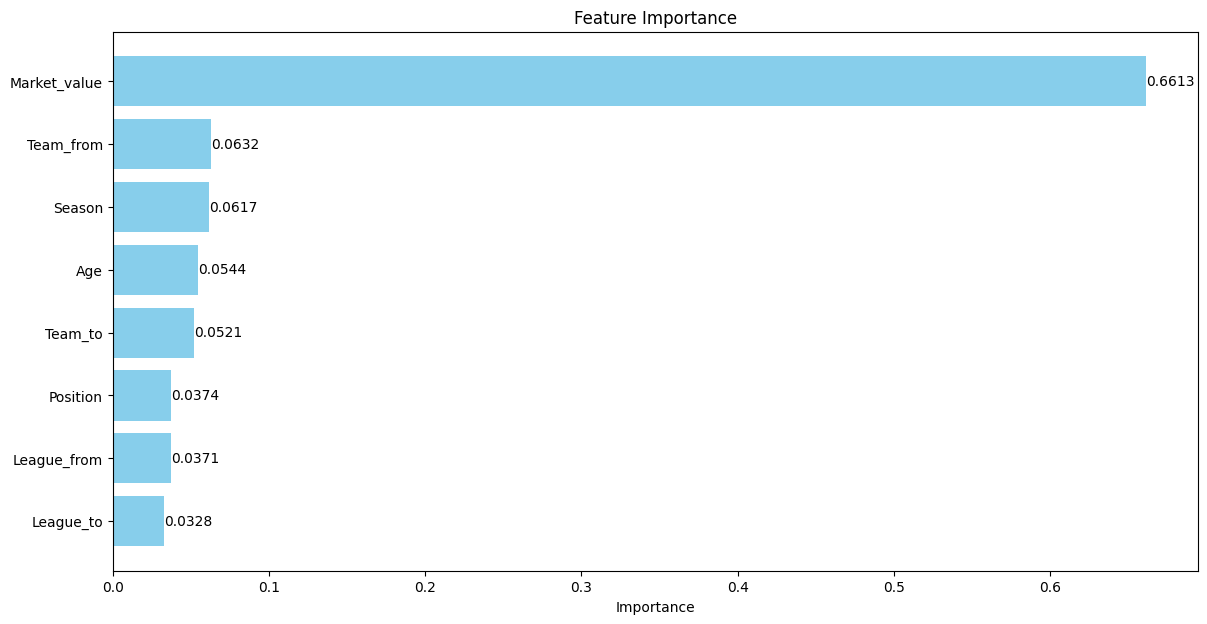

In [25]:
plt.figure(figsize=(14, 7))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, '{:.4f}'.format(bar.get_width()),
             va='center', ha='left', fontsize=10, color='black')

plt.show()

# Model Selection

In [26]:
selected_features = ['Market_value', 'Team_from', 'Season', 'Age']
target_variable = 'Transfer_fee'
df1 = df[selected_features + [target_variable]]

In [27]:
df1.head()

,Market_value,Team_from,Season,Age,Transfer_fee
0,6000000.0,183,0,27,60000000
1,6000000.0,386,0,25,56810000
2,6000000.0,43,0,27,40000000
3,6000000.0,217,0,31,36150000
4,6000000.0,426,0,21,34500000


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
X = df1.drop(columns=['Transfer_fee'])
y = df1['Transfer_fee']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
rf_regressor = RandomForestRegressor(random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 36732574654744.96
Mean Absolute Error (MAE): 3637996.831475853
R-squared (R2) Score: 0.6345173563092467


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [48]:
mse_scores = []
mae_scores = []
r2_scores = []

In [49]:
print("Training Linear Regression...")
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

Training Linear Regression...


In [50]:
mse_scores.append(mse_linear)
mae_scores.append(mae_linear)
r2_scores.append(r2_linear)
print("Linear Regression:")
print(f"  Mean Squared Error (MSE): {mse_linear}")
print(f"  Mean Absolute Error (MAE): {mae_linear}")
print(f"  R-squared (R2) Score: {r2_linear}")

Linear Regression:
  Mean Squared Error (MSE): 38971181945935.26
  Mean Absolute Error (MAE): 3808613.859519945
  R-squared (R2) Score: 0.612243608316906


In [51]:
print("Training Decision Tree Regressor...")
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

Training Decision Tree Regressor...


In [52]:
mse_scores.append(mse_tree)
mae_scores.append(mae_tree)
r2_scores.append(r2_tree)
print("Decision Tree Regressor:")
print(f"  Mean Squared Error (MSE): {mse_tree}")
print(f"  Mean Absolute Error (MAE): {mae_tree}")
print(f"  R-squared (R2) Score: {r2_tree}")

Decision Tree Regressor:
  Mean Squared Error (MSE): 61866579521276.59
  Mean Absolute Error (MAE): 4662067.375886525
  R-squared (R2) Score: 0.38443843776086684


In [53]:
print("Training Gradient Boosting Regressor...")
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

Training Gradient Boosting Regressor...


In [54]:
mse_scores.append(mse_gb)
mae_scores.append(mae_gb)
r2_scores.append(r2_gb)
print("Gradient Boosting Regressor:")
print(f"  Mean Squared Error (MSE): {mse_gb}")
print(f"  Mean Absolute Error (MAE): {mae_gb}")
print(f"  R-squared (R2) Score: {r2_gb}")

Gradient Boosting Regressor:
  Mean Squared Error (MSE): 34748041530543.387
  Mean Absolute Error (MAE): 3451590.5553178964
  R-squared (R2) Score: 0.6542631111206745


In [55]:
print("Training Support Vector Regressor...")
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

Training Support Vector Regressor...


In [56]:
mse_scores.append(mse_svr)
mae_scores.append(mae_svr)
r2_scores.append(r2_svr)
print("Support Vector Regressor:")
print(f"  Mean Squared Error (MSE): {mse_svr}")
print(f"  Mean Absolute Error (MAE): {mae_svr}")
print(f"  R-squared (R2) Score: {r2_svr}")

Support Vector Regressor:
  Mean Squared Error (MSE): 109036133006194.0
  Mean Absolute Error (MAE): 5472331.461112726
  R-squared (R2) Score: -0.08489030577040246


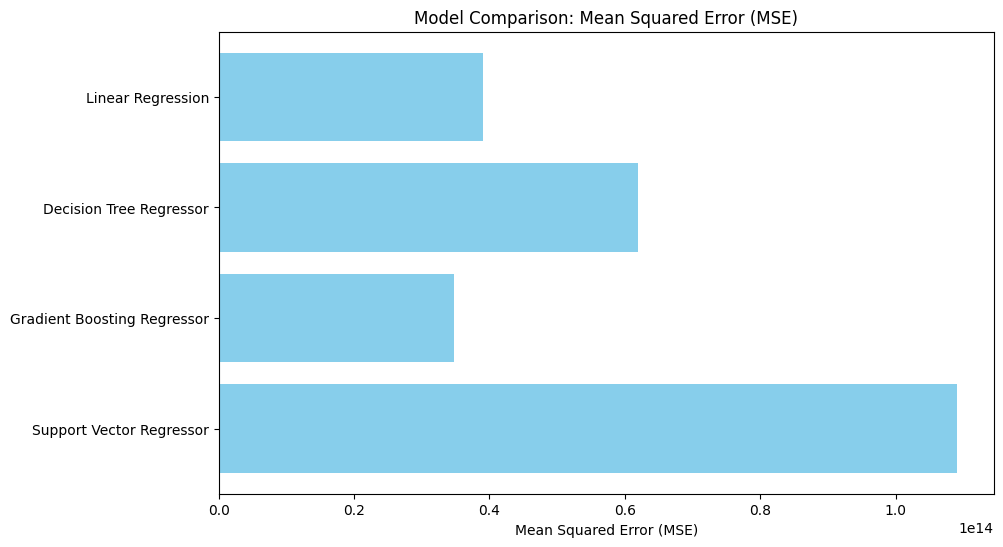

In [57]:
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'Support Vector Regressor']
plt.figure(figsize=(10, 6))
plt.barh(model_names, mse_scores, color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Model Comparison: Mean Squared Error (MSE)')
plt.gca().invert_yaxis()
plt.show()

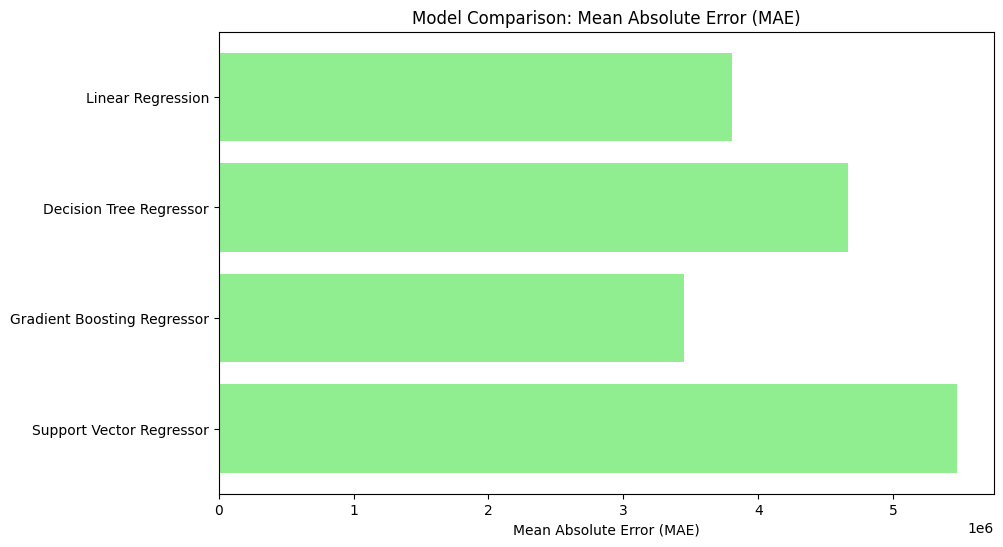

In [58]:
plt.figure(figsize=(10, 6))
plt.barh(model_names, mae_scores, color='lightgreen')
plt.xlabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison: Mean Absolute Error (MAE)')
plt.gca().invert_yaxis()
plt.show()

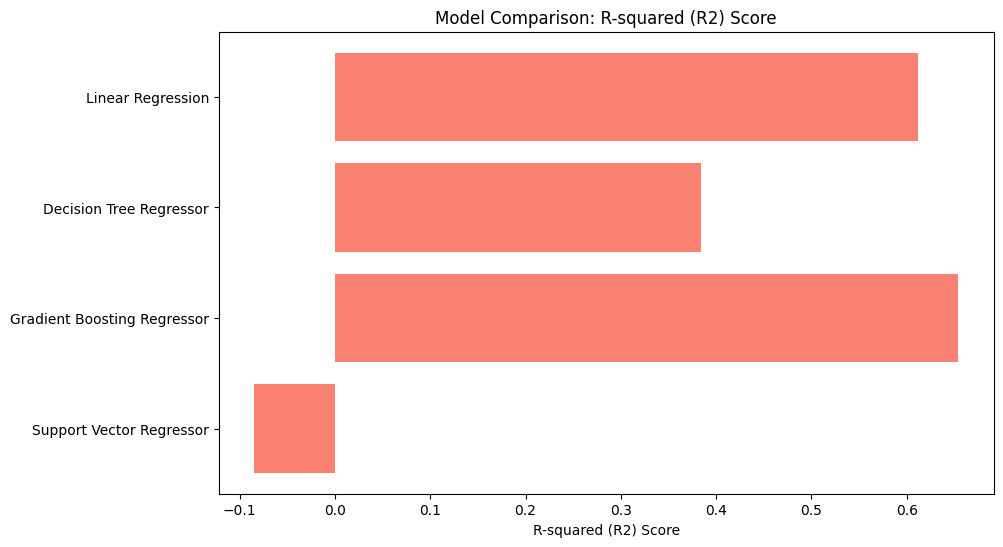

In [59]:
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_scores, color='salmon')
plt.xlabel('R-squared (R2) Score')
plt.title('Model Comparison: R-squared (R2) Score')
plt.gca().invert_yaxis()
plt.show()

Based on the evaluation metrics provided, the Gradient Boosting Regressor seems to be the best-performing model among the ones tested. Here's why:


1. **Mean Squared Error (MSE)**: The Gradient Boosting Regressor has the lowest MSE among all models, indicating smaller prediction errors on average.


2. **Mean Absolute Error (MAE)**: Similarly, the Gradient Boosting Regressor has the lowest MAE, suggesting smaller absolute prediction errors.


3. **R-squared (R2) Score**: The R-squared score of the Gradient Boosting Regressor is also the highest, indicating that it explains the most variance in the target variable compared to other models.


# Hyperparameter tuning

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [65]:
gb_reg = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [67]:
best_model = grid_search.best_estimator_

In [68]:
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Model Evaluation:")
print(f"  Mean Squared Error (MSE): {mse_best}")
print(f"  Mean Absolute Error (MAE): {mae_best}")
print(f"  R-squared (R2) Score: {r2_best}")

Best Model Evaluation:
  Mean Squared Error (MSE): 36272187901889.08
  Mean Absolute Error (MAE): 3596606.759769752
  R-squared (R2) Score: 0.6390981233569013


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

rf_reg = RandomForestRegressor(random_state=42)

voting_reg = VotingRegressor(estimators=[('gb', best_model), ('rf', rf_reg)])

voting_reg.fit(X_train, y_train)

y_pred_voting = voting_reg.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred_voting)
mae_voting = mean_absolute_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print("Ensemble Model Evaluation:")
print(f"  Mean Squared Error (MSE): {mse_voting}")
print(f"  Mean Absolute Error (MAE): {mae_voting}")
print(f"  R-squared (R2) Score: {r2_voting}")

Ensemble Model Evaluation:
  Mean Squared Error (MSE): 35016384746192.93
  Mean Absolute Error (MAE): 3546906.529274187
  R-squared (R2) Score: 0.6515931434205093


As per the observation, the ensemble model which combines the Gradient Boosting Regressor and the Random Forest Regressor, has improved performance compared to using either model individually. Here's a summary of the evaluation metrics:


- Mean Squared Error (MSE): 35,016,384,746,192.93
- Mean Absolute Error (MAE): 3,546,906.529274187
- R-squared (R2) Score: 0.6515931434205093


These results suggest that the ensemble model has lower prediction errors and explains more variance in the target variable compared to the individual models. The R-squared (R2) score also indicates a better fit to the data.


In [70]:
MyModel = voting_reg

In [71]:
MyModel

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=7,
                                                       min_samples_leaf=2,
                                                       min_samples_split=10,
                                                       n_estimators=200,
                                                       random_state=42)),
                            ('rf', RandomForestRegressor(random_state=42))])

In [94]:
import joblib

joblib.dump(MyModel, 'MyModel.pkl')
print("Model saved successfully!")

Model saved successfully!


# Cross Validation

In [72]:
from sklearn.model_selection import cross_val_score

In [74]:
k = 5  # Number of folds
mse_scores = cross_val_score(MyModel, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(MyModel, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(MyModel, X_train, y_train, cv=k, scoring='r2')

In [75]:
mse_scores = -mse_scores
mae_scores = -mae_scores

In [76]:
mean_mse = np.mean(mse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)
std_mse = np.std(mse_scores)
std_mae = np.std(mae_scores)
std_r2 = np.std(r2_scores)

In [77]:
print("K-fold Cross-Validation Results:")
print(f"  Mean Squared Error (MSE): {mean_mse} +/- {std_mse}")
print(f"  Mean Absolute Error (MAE): {mean_mae} +/- {std_mae}")
print(f"  R-squared (R2) Score: {mean_r2} +/- {std_r2}")

K-fold Cross-Validation Results:
  Mean Squared Error (MSE): 38209272384081.24 +/- 7017712370933.483
  Mean Absolute Error (MAE): 3622022.1758355484 +/- 124193.53336715144
  R-squared (R2) Score: 0.6524214065267538 +/- 0.0662169305273302


These results provide estimates of the model's performance along with their uncertainty across different train-test splits of the data. The mean values give an indication of the overall performance, while the standard deviations provide insights into the variability of the performance metrics across folds.

# Testing on Custom Data from user

In [79]:
def predict_transfer_fee(model, market_value, team_from, season, age):
    input_data = np.array([[market_value, team_from, season, age]])
    prediction = model.predict(input_data)
    return prediction

In [84]:
import warnings
def predict_transfer_fee(model, market_value, team_from, season, age):
    input_data = np.array([[market_value, team_from, season, age]])
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        prediction = model.predict(input_data)
    return prediction

In [92]:
market_value = float(input("Enter Market Value: "))
team_from = input("Enter Team From: ")
season = int(input("Enter Season: "))
age = int(input("Enter Age: "))

prediction = predict_transfer_fee(MyModel, market_value, team_from, season, age)
print("Predicted Transfer Fee:", prediction)

Enter Market Value: 4500000
Enter Team From: 52
Enter Season: 8
Enter Age: 30
Predicted Transfer Fee: [5512545.45966625]


In [93]:
market_value = float(input("Enter Market Value: "))
team_from = input("Enter Team From: ")
season = int(input("Enter Season: "))
age = int(input("Enter Age: "))

prediction = predict_transfer_fee(MyModel, market_value, team_from, season, age)
print("Predicted Transfer Fee:", prediction)

Enter Market Value: 7500000
Enter Team From: 10
Enter Season: 5
Enter Age: 34
Predicted Transfer Fee: [5462678.62337357]


In [97]:
market_value = float(input("Enter Market Value: "))
team_from = input("Enter Team From: ")
season = int(input("Enter Season: "))
age = int(input("Enter Age: "))

prediction = predict_transfer_fee(MyModel, market_value, team_from, season, age)
print("Predicted Transfer Fee:", prediction)

Enter Market Value: 2000000
Enter Team From: 9
Enter Season: 3
Enter Age: 21
Predicted Transfer Fee: [4974973.5870953]
